# Error Metrics

In [1]:
import numpy as np
import pandas as pd

## Regression
* **Mean Absolute Percentage Error (MAPE)**: MAPE is often used when you want a measure that is independent of the scale of your data. It expresses the error as a percentage of the actual values, making it easier to interpret and compare across different datasets or models, regardless of their units or scales.
  * The output can be arbitrarily high when y_true is small or when abs(y_true - y_pred) is large (which is common for most regression metrics).

$$
MAPE = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{Actual_i - Prediction_i}{Actual_i} \right| \times 100\%
$$


* **Modified MAPE (MMAPE) or Adjusted MAPE**: To address the issue of small actual values, a modified version of MAPE can be used where a small constant is added to the denominator to avoid extremely high percentage errors.

$$
\text{MMAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{A_i - P_i}{A_i + \epsilon} \right| \times 100\%
$$

* **Symmetric MAPE (sMAPE)**: This is an alternative to MAPE that equally penalizes overforecast and underforecast by modifying the denominator to be the average of the predicted and actual values, thus avoiding the issue when actual values are near zero.

$$
\text{sMAPE} = \frac{1}{n} \sum_{i=1}^{n} \frac{2 \times \left| A_i - P_i \right|}{\left| A_i \right| + \left| P_i \right|} \times 100\%
$$


In [2]:
df = pd.DataFrame({    
    'actual':       [0, 100, 200, 300, 400, 500],
    'predicted':    [1, 110, 210, 320, 380, 480]
})

df['MAPE'] = abs((df['actual'] - df['predicted']) / df['actual']) * 100
df['MMAPE'] = abs((df['actual'] - df['predicted']) / (df['actual'] + 1e-8)) * 100
df['SMAPE'] = 2 * abs(df['actual'] - df['predicted']) / (abs(df['actual']) + abs(df['predicted'])) * 100

df

,actual,predicted,MAPE,MMAPE,SMAPE
0,0,1,inf,1.000000e+10,200.000000
1,100,110,10.000000,1.000000e+01,9.523810
2,200,210,5.000000,5.000000e+00,4.878049
3,300,320,6.666667,6.666667e+00,6.451613
4,400,380,5.000000,5.000000e+00,5.128205
5,500,480,4.000000,4.000000e+00,4.081633


* **Mean Squared Error (MSE)**: Useful when large errors are particularly undesirable. Since it squares the errors before averaging them, larger errors have a disproportionately larger impact on the metric. 

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (A_i - P_i)^2
$$

* **Root Mean Squared Error (RMSE)**:
$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (A_i - P_i)^2}
$$

* **Mean Absolute Error (MAE)**:
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |A_i - P_i|
$$


In [3]:
df = pd.DataFrame({    
    'actual':       [0, 100, 200, 300, 400, 500],
    'predicted':    [1, 110, 210, 320, 380, 480]
})

df['MSE'] = (df['actual'] - df['predicted']) ** 2
# df['RMSE'] = np.sqrt(df['MSE'])
df['MAE'] = abs(df['actual'] - df['predicted'])

print("MSE:", df['MSE'].mean())
print(f"RMSE: {np.sqrt(df['MSE'].mean()):.2f}")
print("MAE:", df['MAE'].mean())

display(df)

MSE: 233.5
RMSE: 15.28
MAE: 13.5


,actual,predicted,MSE,MAE
0,0,1,1,1
1,100,110,100,10
2,200,210,100,10
3,300,320,400,20
4,400,380,400,20
5,500,480,400,20


## Classification metrics


1. Accuracy:
$$ 
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

2. Precision: 
$$ 
\text{Precision} = \frac{TP}{TP + FP} 
$$

3. Recall: 
$$ 
\text{Recall} = \frac{TP}{TP + FN}
$$

4. F1 Score:
$$ 
\text{F1 Score} = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

5. ROC AUC Score: The ROC AUC Score requires the model's predicted probabilities, so it cannot be calculated without them.


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def eval_classification_perf(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(4, 3))
    cax = ax.matshow(cm, cmap='Blues')
    plt.colorbar(cax)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels([0, 1])
    ax.set_yticklabels([0, 1])

    # Choose text color based on the background
    threshold = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            color = "white" if cm[i, j] > threshold else "black"
            ax.text(j, i, format(cm[i, j], 'd'), 
                    ha="center", va="center",
                    color=color)

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
y_true = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
y_pred = [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]

eval_classification_perf(y_true, y_pred)

Accuracy: 0.82
Precision: 0.67
Recall: 1.00
F1 Score: 0.80


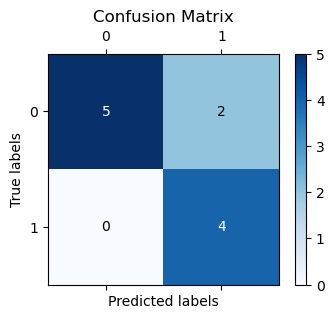

In [41]:
y_true = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
y_pred = [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]

eval_classification_perf(y_true, y_pred)

Accuracy: 0.82
Precision: 1.00
Recall: 0.67
F1 Score: 0.80


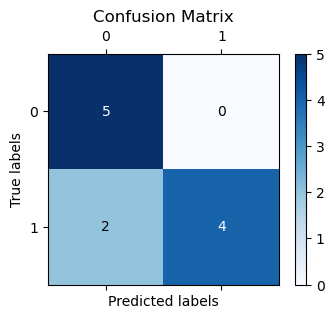

In [42]:
y_true = [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]
y_pred = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

eval_classification_perf(y_true, y_pred)

In [27]:
# import seaborn as sns
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.show()